After seeing the correlations, you can start experimenting by including or excluding certain features. Here are a few ideas:

	1.	Remove weakly correlated features: If some features have very low correlation with RetailPrice, you might want to exclude them.
	2.	Try interactions: Create new features based on interactions between existing features (e.g., fat-to-carb ratio).
	3.	Feature scaling: Standardizing or normalizing features may help in some cases.


In [2]:
# Import necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read price data
file_path = Path("../part 1 ETL Workflow/working.csv")
df_price = pd.read_csv(file_path)

In [11]:
df_price.columns

Index(['product', 'RetailPrice', 'energy_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'g_sum', 'other_carbs', 'reconstructed_energy',
       'boxcox_carbohydrates_100g', 'transformed_carbohydrates_100g',
       'boxcox_fat_100g', 'transformed_fat_100g', 'boxcox_proteins_100g',
       'transformed_proteins_100g', 'boxcox_sugars_100g',
       'transformed_sugars_100g', 'boxcox_other_carbs',
       'transformed_other_carbs', 'boxcox_salt_100g', 'transformed_salt_100g',
       'boxcox_energy_100g', 'transformed_energy_100g',
       'boxcox_reconstructed_energy', 'transformed_reconstructed_energy',
       'boxcox_g_sum', 'transformed_g_sum', 'cluster', 'category', 'certainty',
       'alternative_cluster', 'alternative_category', 'anomaly'],
      dtype='object')

In [7]:
# Drop the transformed and Box-Cox transformed features
df_cleaned_no_transforms = df_price.drop(columns=[
    'boxcox_carbohydrates_100g', 'transformed_carbohydrates_100g',
    'boxcox_fat_100g', 'transformed_fat_100g',
    'boxcox_proteins_100g', 'transformed_proteins_100g',
    'boxcox_sugars_100g', 'transformed_sugars_100g',
    'boxcox_other_carbs', 'transformed_other_carbs',
    'boxcox_salt_100g', 'transformed_salt_100g',
    'boxcox_energy_100g', 'transformed_energy_100g',
    'boxcox_reconstructed_energy', 'boxcox_g_sum', 'transformed_g_sum'
])

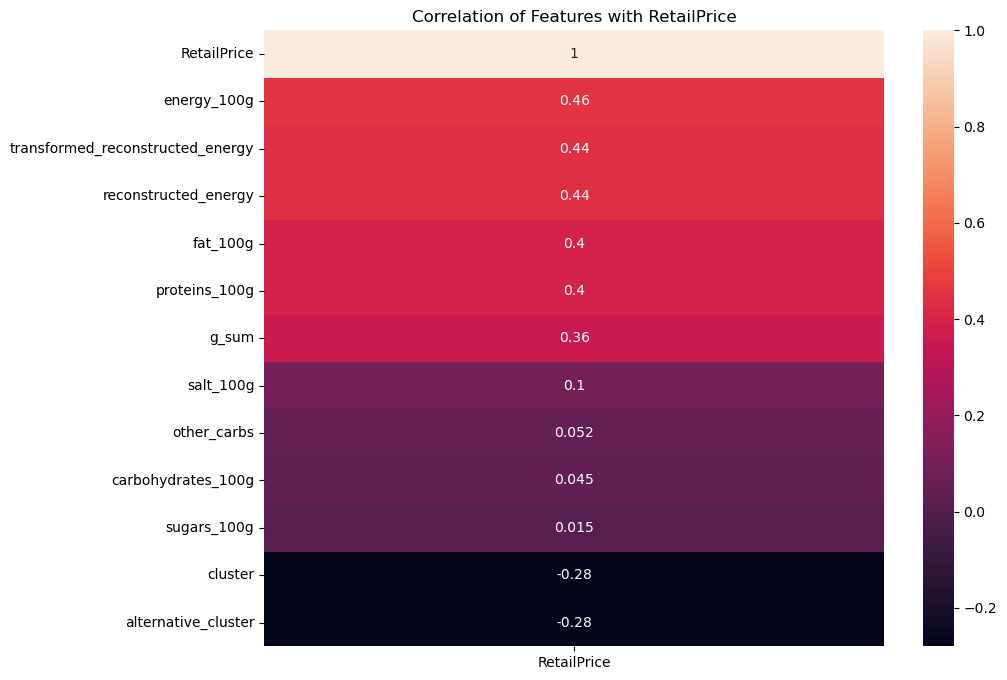

In [10]:


#drop all categorical columns


df_price300 = df_cleaned_no_transforms.drop(columns=['product', 'category', 'alternative_category', 'certainty', 'anomaly'])


# Correlation matrix
corr_matrix = df_price300.corr()


# Visualize correlations with the target (RetailPrice)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['RetailPrice']].sort_values(by='RetailPrice', ascending=False), annot=True)
plt.title('Correlation of Features with RetailPrice')
plt.show()

Multicollinearity can hurt: If features are too correlated with each other, this can cause instability in the model.

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric features for VIF calculation
numeric_features = df_cleaned.drop(columns=['RetailPrice', 'product', 'category', 'alternative_category', 'cluster', 'alternative_cluster', 'anomaly'])

# Add a constant to the features matrix for the VIF calculation
X = numeric_features.assign(constant=1)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show the VIF values
print(vif)

NameError: name 'df_cleaned' is not defined

In [31]:
# Initial imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('part 1 ETL Workflow/working.csv')


# Drop rows with missing target values
df.dropna(subset=['RetailPrice'], inplace=True)

# Convert columns to numeric where possible, coerce errors (non-convertible strings will be set to NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values resulting from conversion errors
df.dropna(inplace=True)

# Define features set (dropping non-numerical columns)
X = df.drop(columns=['product', 'cluster', 'category'])

# Define target vector (predicting cluster)
y = df['RetailPrice'].ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy Score: {acc}")
print(f"Classification Report:\n{report}")

/var/folders/y9/yjkwjxy552l0r3g66ghndhyh0000gn/T/ipykernel_21611/1490692285.py:25: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df['RetailPrice'].ravel()


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric features for VIF calculation
numeric_features = df_cleaned.drop(columns=['RetailPrice', 'product', 'category', 'alternative_category', 'cluster', 'alternative_cluster', 'anomaly'])

# Add a constant to the features matrix for the VIF calculation
X = numeric_features.assign(constant=1)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show the VIF values
print(vif)